# Statistics Assignment

## Import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import skew
from scipy.stats import expon

## Q1

In [5]:
# Generate a list of 100 integers containing values between 90 to 130 and store it in the variable `int_list`. 
# After generating the list, find the following:
data = np.random.randint(90,131,100)

In [6]:
d = [111,  94, 126, 120, 112, 113, 109, 104, 129, 104, 129, 119, 100,
       130,  93, 120,  99, 121,  98,  94, 108, 103,  96,  91,  97, 121,
        92, 107, 107, 107, 126,  95,  90, 124, 101, 126, 118,  97, 115,
       124, 118,  99, 101, 119, 106,  98, 116, 119, 111,  95, 105, 110,
       129, 114, 101,  95,  98, 114, 115, 107,  98, 129, 108, 107, 100,
       112, 107,  92,  92, 113, 119,  97, 119, 114, 120, 106, 105,  97,
       120, 102, 118, 124,  93, 103, 110,  94, 127,  91, 121,  97, 126,
       111, 106, 125, 130, 124, 104,  97, 102,  95]

### A

In [8]:
# Write a Python function to calculate the mean of a given list of numbers.
def cal_mean(x):
    mean = np.mean(x)
    return(mean)

In [9]:
cal_mean(data)

109.7

In [10]:
# Create a function to find the median of a list of numbers.
def cal_median(x):
    median = np.median(x)
    return(median)

In [11]:
cal_median(data)

109.5

### B

In [13]:
# Develop a program to compute the mode of a list of integers.
unique_values,counts = np.unique(data,return_counts=True)
unique_values

array([ 90,  91,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 130])

In [14]:
counts

array([1, 1, 5, 1, 1, 7, 2, 6, 3, 1, 2, 4, 3, 3, 2, 3, 2, 1, 2, 2, 2, 2,
       4, 1, 1, 5, 2, 4, 4, 3, 1, 5, 4, 4, 2, 2, 2], dtype=int64)

In [15]:
mode_index = np.argmax(counts)
mode_value = unique_values[mode_index]
print("mode :" , mode_value)

mode : 96


In [16]:
mode_index

5

### C

In [18]:
# Implement a function to calculate the weighted mean of a list of values and their corresponding weights.
values = [ 90,  91,  92,  94,  95,  96,  97,  98,  99, 100, 101, 102, 104,105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
weights = [3, 1, 4, 3, 2, 2, 2, 3, 3, 1, 3, 4, 2, 3, 1, 4, 4, 3, 4, 3, 2, 4,1, 3, 1, 3, 4, 6, 3, 5, 1, 1, 1, 1, 3, 2, 4]

def weighted_mean(values,weights):
    
    if len(values) != len(weights) or len(values) == 0:
        print("values and weights must be of the same lenght and non-empty")
    else:
        total_weight = sum(weights)
        if total_weight == 0:
            print("total weight must be non-zero")
        else:
            weighted_sum = sum(v*w for v,w in zip(values,weights))
            return weighted_sum / total_weight

In [19]:
weighted_mean(values,weights)

110.64

### D

In [21]:
# Write a Python function to find the geometric mean of a list of positive numbers.
import math
from functools import reduce
numbers = [10,18,27,-4,-85,7,3,-45]
def geometric_mean(numbers):
    positive_no = []
    for i in numbers:
        if i > 0:
            positive_no.append(i)
    product = reduce(lambda x,y:x*y,positive_no)
    return product ** (1/len(positive_no))

In [22]:
geometric_mean(numbers)

10.040864648496282

### E

In [24]:
# Create a program to calculate the harmonic mean of a list of values.
numbers = [8,4,3,5]
def harmonic_mean(numbers):
    n= len(numbers)
    raciprocal_sum = sum(1/i for i in numbers)
    return n/raciprocal_sum

In [25]:
harmonic_mean(numbers)

4.4036697247706424

### F

In [27]:
# Build a function to determine the midrange of a list of numbers (average of the minimum and maximum).
d = [111,  94, 126, 120, 112, 113, 109, 104, 129, 104, 129, 119, 100,
       130,  93, 120,  99, 121,  98,  94, 108, 103,  96,  91,  97, 121,
        92, 107, 107, 107, 126,  95,  90, 124, 101, 126, 118,  97, 115,
       124, 118,  99, 101, 119, 106,  98, 116, 119, 111,  95, 105, 110,
       129, 114, 101,  95,  98, 114, 115, 107,  98, 129, 108, 107, 100,
       112, 107,  92,  92, 113, 119,  97, 119, 114, 120, 106, 105,  97,
       120, 102, 118, 124,  93, 103, 110,  94, 127,  91, 121,  97, 126,
       111, 106, 125, 130, 124, 104,  97, 102,  95]
def midrange(d):
    min_value = np.min(d)
    max_value = np.max(d)
    return (min_value + max_value)/2

In [28]:
midrange(d)

110.0

### H

In [30]:
# Implement a Python program to find the trimmed mean of a list, excluding a certain percentage of outliers
percentage = 20
def trimmed_mean(d,percentage):
    n = len(d)
    sorted_num = sorted(d)
    k = int(n * (percentage/100))  #no of values trim from each side
    trimmed_list = sorted_num[k:n - k]
    return sum(trimmed_list)/len(trimmed_list)

In [31]:
trimmed_mean(d,percentage)

108.4

## Q2

In [33]:
#  Generate a list of 500 integers containing values between 200 to 300 and store it in the variable `int_list2`. 
# After generating the list, find the following:
np.random.seed(5)
int_list2 = np.random.randint(200,301,500)

### A

In [35]:
# Compare the given list of visualization for the given data:# 1 Frequency & Gaussian distributionn# 2 . Frequency smoothened KDE plo# 3 3. Gaussian distribution & smoothened KDE plot

#### 1

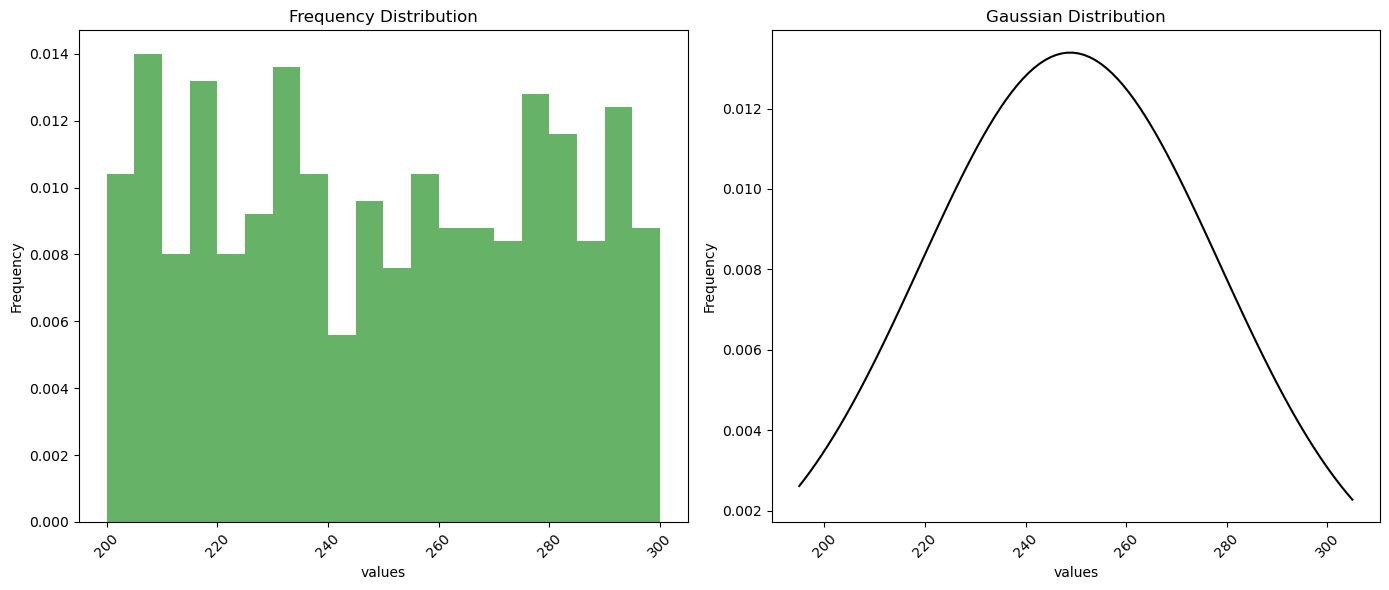

In [37]:
# Frequency & Gaussian distribution 

mean = np.mean(int_list2)
std_dev = np.std(int_list2)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.hist(int_list2,bins =20,color='g',density=True,alpha=0.6)
plt.title('Frequency Distribution')
plt.xticks(rotation = 45)
plt.xlabel('values')
plt.ylabel('Frequency')

xmin , xmax = plt.xlim()
x= np.linspace(xmin,xmax,100)
p = norm.pdf(x,mean,std_dev)
plt.subplot(1,2,2)
plt.plot(x,p,'k')
plt.title('Gaussian Distribution')
plt.xlabel('values')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

#### 2

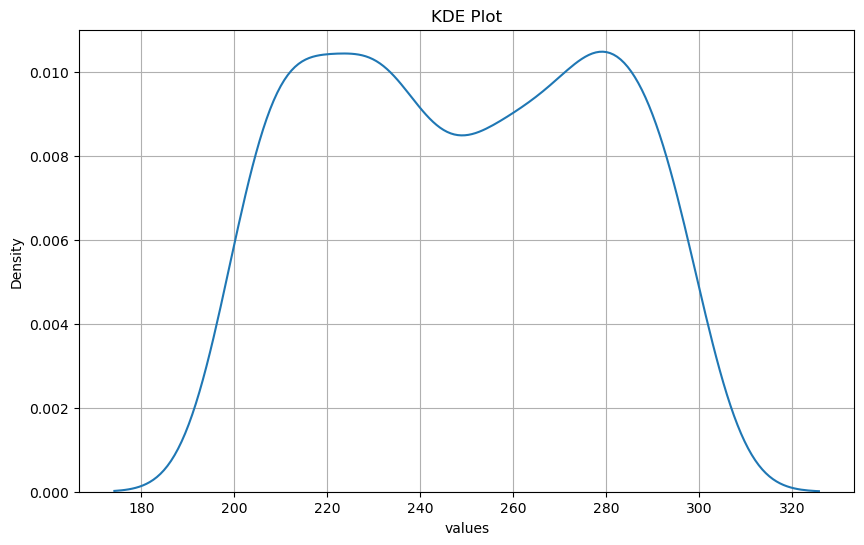

In [39]:
# Frequency smoothened KDE plot
plt.figure(figsize=(10,6))

sns.kdeplot(int_list2)
plt.title('KDE Plot')
plt.xlabel('values')
plt.ylabel('Density')
plt.grid()
plt.show()

#### 3

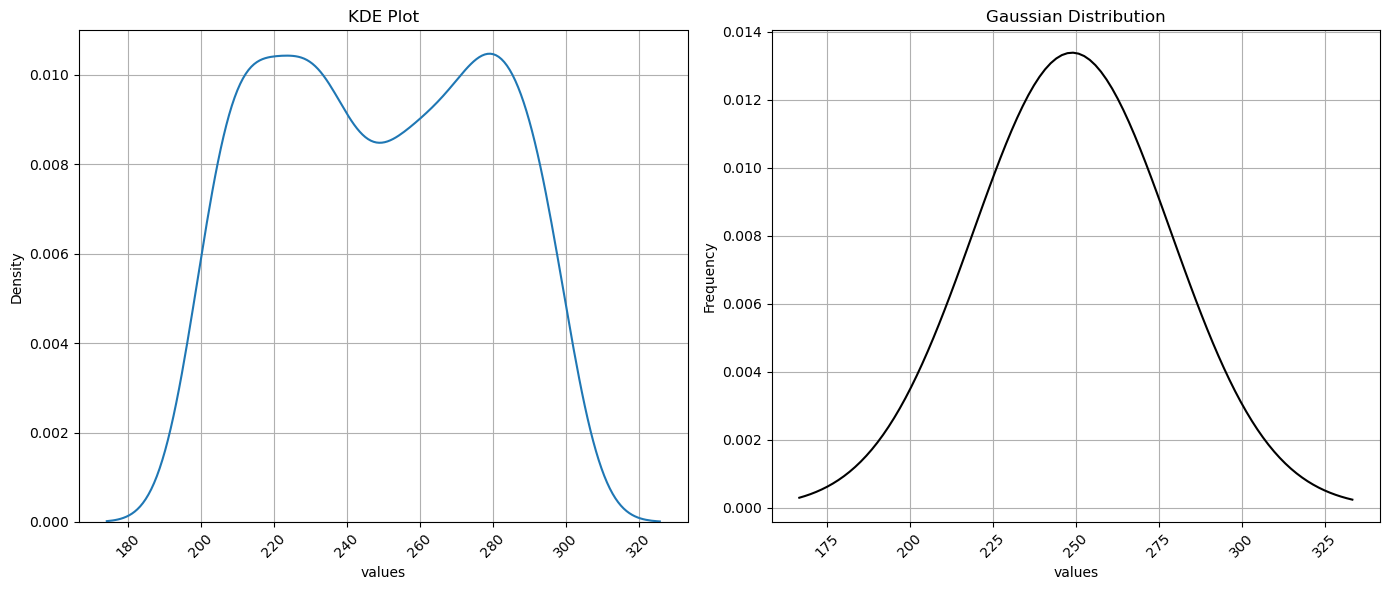

In [41]:
# Gaussian distribution & smoothened KDE plot
# Frequency & Gaussian distribution 

mean = np.mean(int_list2)
std_dev = np.std(int_list2)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.kdeplot(int_list2)
plt.title('KDE Plot')
plt.xlabel('values')
plt.ylabel('Density')
plt.grid()
plt.xticks(rotation = 45)

xmin , xmax = plt.xlim()
x= np.linspace(xmin,xmax,100)
p = norm.pdf(x,mean,std_dev)
plt.subplot(1,2,2)
plt.plot(x,p,'k')
plt.title('Gaussian Distribution')
plt.xlabel('values')
plt.ylabel('Frequency')
plt.grid()
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

### B

In [43]:
# Write a Python function to calculate the range of a given list of numbers.
def range_cal(int_list2):
    min = np.min(int_list2)
    max = np.max(int_list2)
    range = max - min
    return range

In [44]:
range_cal(int_list2)

100

### C

In [46]:
# Create a program to find the variance and standard deviation of a list of numbers.
variance , standard_deviation = np.var(int_list2) , np.std(int_list2)

In [47]:
variance

887.558124

In [48]:
std_dev

29.791913735106043

### D

In [50]:
# Implement a function to compute the interquartile range (IQR) of a list of values.
def interquartile_range(int_list2):
    Q3 = np.quantile(int_list2,0.75)
    Q1 = np.quantile(int_list2,0.25)
    IQR = Q3-Q1
    return IQR

In [51]:
interquartile_range(int_list2)

54.0

### E

In [53]:
# Build a program to calculate the coefficient of variation for a dataset.
def coefficient_of_variation(int_list2):
    mean = np.mean(int_list2)
    std_deviation = np.std(int_list2,ddof=0)
    cv = (std_deviation/mean)*100
    return cv

In [54]:
coefficient_of_variation(int_list2)

11.970681443262873

### F

In [56]:
# Write a Python function to find the mean absolute deviation (MAD) of a list of numbers.
def mean_absolute_deviation(int_list2):
    mean = np.mean(int_list2)
    absolute_deviation = np.abs(data - mean)
    MAD = np.mean(absolute_deviation)
    return MAD

In [57]:
mean_absolute_deviation(int_list2)

139.174

### G

In [59]:
# Create a program to calculate the quartile deviation of a list of values.
def quartile_deviation(int_list2):
    Q3 = np.quantile(int_list2,0.75)
    Q1 = np.quantile(int_list2,0.25)
    QD = (Q3-Q1)/2
    return QD

In [60]:
quartile_deviation(int_list2)

27.0

### H

In [62]:
# Implement a function to find the range-based coefficient of dispersion for a dataset.
def coefficient_of_dispersion(int_list2):
    mean = np.mean(int_list2)
    data_range = np.max(int_list2) - np.min(int_list2)
    CD = (data_range/mean) * 100
    return CD

In [63]:
coefficient_of_dispersion(int_list2)

40.18097511190402

## Q3

In [65]:
# Write a Python class representing a discrete random variable with methods to calculate its expected value and variance
probabilities = [.1,.2,.3,.4,.5,.6,.7,.8,.9] 
values = [1,2,3,4,5,6,7,8,9]
class Discreterandomvariable:
    def __init__(self,probabilities,values):
        self.probabilities = np.array(probabilities)
        self.values = np.array(values)

    def expected_value(self):
        return np.sum(self.probabilities * self.values)

    def variance(self):
        mean = self.expected_value()
        return np.sum(self.probabilities * (self.values-mean) ** 2) 

In [66]:
rv = Discreterandomvariable(probabilities,values)

In [67]:
rv.expected_value()

28.5

In [68]:
rv.variance()

2233.125

## Q4

In [70]:
#  Implement a program to simulate the rolling of a fair six-sided die and calculate the expected value and variance of the outcomes.
num_rolls = 1000
def simulate_die_rolls(num_rolls):
    outcomes = np.random.randint(1,7,size= num_rolls)
    return outcomes

def expected_value(outcomes):
     return np.mean(outcomes)

def variance(outcomes):
    return np.var(outcomes)

In [71]:
outcomes = simulate_die_rolls(num_rolls)

In [72]:
expected_value(outcomes)

3.458

In [73]:
variance(outcomes)

2.960236

## Q5

In [75]:
# Create a Python function to generate random samples from a given probability distribution (e.g., binomial, Poisson) and 
# calculate their mean and variance.
def gen_sample(dist_type,*params,size = 1000):
    if dist_type == 'binomial':
        n,p = params
        samples = np.random.binomial(n,p,size = 1000)
    elif dist_type == 'poisson':
        lambda_ = params[0]
        samples = np.random.poisson(lambda_,size = 1000)
    else:
        print("unsupported distribution typr use either 'binomial' or 'poisson'.")

    mean = np.mean(samples)
    variance = np.var(samples)
    return mean , variance

In [76]:
mean , variance = gen_sample('binomial',10,0.5,size = 1000)

In [77]:
mean

5.05

In [78]:
variance

2.5575

In [79]:
mean , variance = gen_sample('poisson',5,size = 1000)

In [80]:
mean

4.99

In [81]:
variance

5.0539000000000005

## Q6

In [83]:
#  Write a Python script to generate random numbers from a Gaussian (normal) distribution and 
# compute the mean, variance, and standard deviation of the samples.
def guassian_sample(mean=0,std_dev=1,size = 1000):
    samples = np.random.normal(loc= mean , scale = std_dev,size=size)
    mean_samples = np.mean(samples)
    variance_samples = np.var(samples)
    std_dev_samples = np.std(samples)
    return mean_samples,variance_samples,std_dev_samples

In [84]:
mean_samples,variance_samples,std_dev_samples = guassian_sample(mean=0,std_dev=1,size = 1000)

In [85]:
mean_samples

0.015417676622351502

In [86]:
variance_samples

0.9652835612192255

In [87]:
std_dev_samples

0.9824884534788313

## Q7

In [89]:
# Find the following from the dataset for the columns `total_bill` and `tip`:
df = pd.read_csv("tips_dataset.csv")
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [90]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### A

In [92]:
#  Write a Python function that calculates their skewness.
col_1 = 'total_bill'
col_2 = 'tip'
def cal_skewness(df,col_1,col_2):
    data1 = df[col_1]
    data2 = df[col_2]
    skewness1 = skew(data1)
    skewness2 = skew(data2)
    return skewness1,skewness2

In [93]:
cal_skewness(df,col_1,col_2)

(1.1262346334818638, 1.4564266884221506)

### B

In [95]:
# Create a program that determines whether the columns exhibit positive skewness, negative skewness, or is  approximately symmetric.

In [96]:
skew_total_bill = skew(df['total_bill'])
skew_tip = skew(df['tip'])
def classify_skewness(skewness,threshold=0.5):
    if skewness > threshold:
        return 'positive skewness'
    elif skewness < -threshold:
        return 'negetive skewness'
    else:
        return 'approximately symmetric'

In [97]:
skewness_total_bill = classify_skewness(skew_total_bill,threshold=0.5)
print(f"skewness of 'total_bill' : {skewness_total_bill}")
print()
skewness_tip = classify_skewness(skew_tip,threshold=0.5)
print(f"skewness of 'tip' : {skewness_tip}")

skewness of 'total_bill' : positive skewness

skewness of 'tip' : positive skewness


### C

In [99]:
#  Write a function that calculates the covariance between two columns.
col_1 = 'total_bill'
col_2 = 'tip'
def cal_covariance(df,col_1,col_2):
    covariance = df[[col_1,col_2]].cov().loc[:,:]
    return covariance

In [100]:
cal_covariance(df,col_1,col_2)

,total_bill,tip
total_bill,79.252939,8.323502
tip,8.323502,1.914455


### D

In [102]:
#  Implement a Python program that calculates the Pearson correlation coefficient between two columns.
col_1 = 'total_bill'
col_2 = 'tip'
def cal_correlation(df,col_1,col_2):
    correlation = df[[col_1,col_2]].corr().loc[:,:]
    return correlation

In [103]:
cal_correlation(df,col_1,col_2)

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


### E

In [105]:
#  Write a script to visualize the correlation between two specific columns in a Pandas DataFrame using scatter plots.
col_1 = 'total_bill'
col_2 = 'tip'
def scatter_plot(df,col_1,col_2):
    x = df[col_1]
    y = df[col_2]
    plt.figure(figsize=(10,6))
    plt.scatter(x,y)
    plt.title('Scatter Plot')
    plt.xlabel(col_1)
    plt.ylabel(col_2)
    plt.show()

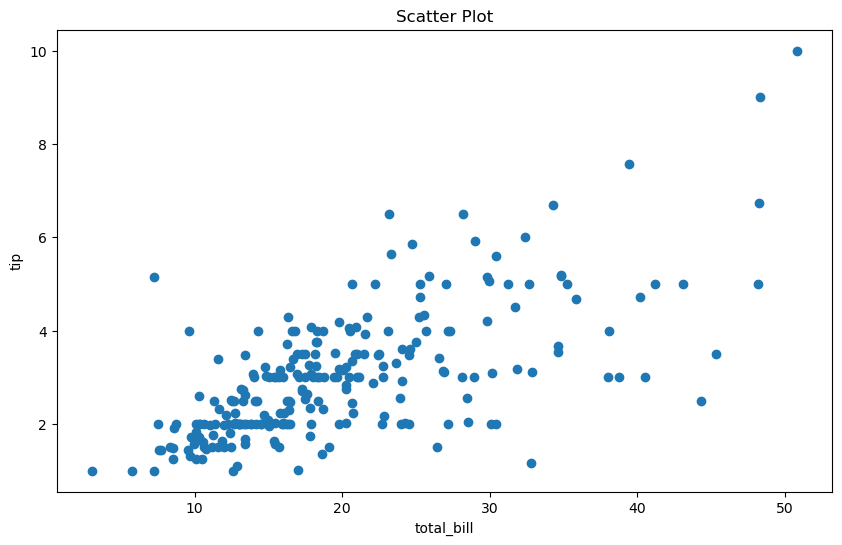

In [106]:
scatter_plot(df,col_1,col_2)

## Q8

In [108]:
# Write a Python function to calculate the probability density function (PDF) of a continuous random variable for a given normal distribution.
def cal_pdf(x,mean=0,std_dev=1):
    pdf_values = norm.pdf(x,loc=mean,scale = std_dev)
    return pdf_values

In [109]:
cal_pdf(5)

1.4867195147342979e-06

## Q9

In [111]:
#  Create a program to calculate the cumulative distribution function (CDF) of exponential distribution
def exp_cdf(x,rate):
     cdf_value = expon.cdf(x,scale = 1/rate)
     return cdf_value

In [112]:
exp_cdf(2,1.5)

0.950212931632136

## Q10

In [114]:
# Write a Python function to calculate the probability mass function (PMF) of Poisson distribution.
def poisson_pmf(k,lambda_):
     pmf_value = poisson.pmf(k,mu = lambda_)
     return pmf_value

In [115]:
poisson_pmf(2,3)

0.22404180765538775

## Q11

In [117]:
#  A company wants to test if a new website layout leads to a higher conversion rate (percentage of visitors who make a purchase). 
# They collect data from the old and new layouts to compare.To generate the data use the following command:
# 50 purchases out of 1000 visitors
old_layout = np.array([1] * 50 + [0] * 950)
# 70 purchases out of 1000 visitors  
new_layout = np.array([1] * 70 + [0] * 930)
#Apply z-test to find which layout is successful.

In [118]:
# calculate proportions
p1 = np.mean(old_layout) 
p2 = np.mean(new_layout)

# sample sizes
n1 = len(old_layout)
n2 = len(new_layout)

# pooled proportion
p_pooled = (np.sum(old_layout)+ np.sum(new_layout))/(n1+n2)

# standard error
se = np.sqrt(p_pooled * (1-p_pooled)* (1/n1 + 1/n2))

# z statistics
z = (p1-p2)/se

# p value for two tail test
p_value = 2 * (1-stats.norm.cdf(np.abs(z)))

print(f"z-stats : {z}")
print()
print(f"p-value : {p_value}")
print()

alpha = 0.05

if p_value < alpha:
    print("the diffrence is statiistically significant. The new layout is more successful")
else:
    print("the diffrence is not statiistically significant. No strong evidence that the new layout is better")

z-stats : -1.883108942886774

p-value : 0.05968560553242619

the diffrence is not statiistically significant. No strong evidence that the new layout is better


## Q12

In [120]:
#  A tutoring service claims that its program improves students' exam scores. A sample of students who participated in the program was taken, 
# and their scores before and after the program were recorded.Use the below code to generate samples of respective arrays of marks:
before_program = np.array([75, 80, 85, 70, 90, 78, 92, 88, 82, 87])
after_program = np.array([80, 85, 90, 80, 92, 80, 95, 90, 85, 88])
#Use z-test to find if the claims made by tutor are true or false

In [121]:
diffrences = after_program - before_program

# mean and standard deviation
mean_diff = np.mean(diffrences) 
std_diff = np.std(diffrences)

# sample size
n = len(diffrences)

# z-stats
z = mean_diff / (std_diff/np.sqrt(n))

# p value for two tail test
p_value = 2 * (1-stats.norm.cdf(np.abs(z)))

print(f"z-stats : {z}")
print()
print(f"p-value : {p_value}")
print()

alpha = 0.05

if p_value < alpha:
    print("the diffrence is statiistically significant. The tutoring program improves scores")
else:
    print("the diffrence is not statiistically significant. No strong evidence that the tutoring program improves scores")

z-stats : 4.841648318657442

p-value : 1.287665097438051e-06

the diffrence is statiistically significant. The tutoring program improves scores


## Q13

In [123]:
# A pharmaceutical company wants to determine if a new drug is effective in reducing blood pressure. They conduct a study and record blood pressure 
# measurements before and after administering the drug.Use the below code to generate samples of respective arrays of blood pressure:
before_drug = np.array([145, 150, 140, 135, 155, 160, 152, 148, 130, 138])
after_drug = np.array([130, 140, 132, 128, 145, 148, 138, 136, 125, 130])
# Implement z-test to find if the drug really works or not

In [124]:
diffrences = before_drug - after_drug

# mean and standard deviation
mean_diff = np.mean(diffrences) 
std_diff = np.std(diffrences)

# sample size
n = len(diffrences)

# z-stats
z = mean_diff / (std_diff/np.sqrt(n))

# p value for two tail test
p_value = 2 * (1-stats.norm.cdf(np.abs(z)))

print(f"z-stats : {z}")
print()
print(f"p-value : {p_value}")
print()

alpha = 0.05

if p_value < alpha:
    print("the diffrence is statiistically significant. The drug is effective in reducing blood pressure")
else:
    print("the diffrence is not statiistically significant. No strong evidence that the drug reduces blood pressure ")

z-stats : 10.593499054713803

p-value : 0.0

the diffrence is statiistically significant. The drug is effective in reducing blood pressure


## Q14 

In [126]:
#  A customer service department claims that their average response time is less than 5 minutes. A sample of recent customer interactions was taken, 
# and the response times were recorded.Implement the below code to generate the array of response time:
response_times = np.array([4.3, 3.8, 5.1, 4.9, 4.7, 4.2, 5.2, 4.5, 4.6, 4.4])
# Implement z-test to find the claims made by customer service department are true or false.

In [127]:
# mean and standard deviation
mu = 5
sample_mean = np.mean(response_times) 
sample_std = np.std(response_times)

# sample size
n = len(response_times)

# z-stats
z = (sample_mean-mu) / (sample_std/np.sqrt(n))

# p value for two tail test
p_value = stats.norm.cdf(z)

print(f"z-stats : {z}")
print()
print(f"p-value : {p_value}")
print()

alpha = 0.05

if p_value < alpha:
    print("the result is statiistically significant. The claim that the average response time is less than 5 minutes is supported")
else:
    print("the result is not statiistically significant. There is no strong evidence to support the claim that the average response time is less than 5 minutes ")

z-stats : -3.356712648559143

p-value : 0.00039437520387081387

the result is statiistically significant. The claim that the average response time is less than 5 minutes is supported


## Q15

In [129]:
# A company is testing two different website layouts to see which one leads to higher click-through rates. Write a Python function to perform an A/B 
# test analysis, including calculating the t-statistic, degrees of freedom, and p-value.Use the following data:
layout_a_clicks = [28, 32, 33, 29, 31, 34, 30, 35, 36, 37]
layout_b_clicks = [40, 41, 38, 42, 39, 44, 43, 41, 45, 47]
a = np.array(layout_a_clicks)
b = np.array(layout_b_clicks)

In [130]:
def ab_test_analysis(layout_a_clicks,layout_b_clicks):

# convert list to array    
    a = np.array(layout_a_clicks)
    b = np.array(layout_b_clicks)

# calculate mean
    mean_a = np.mean(a)
    mean_b = np.mean(b)

# calculate standard deviation
    std_a = np.std(a)
    std_b = np.std(b)

# sample sizes
    n_a = len(a)
    n_b = len(b)

# calculate pooled standard deviation
    pooled_std = np.sqrt(((std_a ** 2) / n_a) + ((std_b ** 2) / n_b))

# calculate t_statistics
    t_stats = (mean_a - mean_b)/pooled_std

# calculate degree of freedom
    numerator = (std_a ** 2 / n_a + std_b ** 2 / n_b) ** 2
    denomintor = ((std_a ** 2 / n_a)**2 / (n_a-1)) + ((std_b ** 2 / n_b)**2 / (n_b-1))
    df = numerator/denomintor

# calculate p_value
    p_val = 2 * stats.t.cdf(-abs(t_stats),df)
    
    return t_stats,df,p_val

In [131]:
t_stats,df,p_val = ab_test_analysis(layout_a_clicks,layout_b_clicks)
print(f"T-statistics: {t_stats}")
print()
print(f"Deegrees of Freedom: {df}")
print()
print(f"P_value: {p_val}")
print()
alpha = 0.05
if p_val < alpha:
    print("there is significant difference in click-through rates between two layouts")
else:
    print("there is 'NO' significant difference in click-through rates between two layouts")

T-statistics: -7.692875136699702

Deegrees of Freedom: 17.879871863320872

P_value: 4.451869906164299e-07

there is significant difference in click-through rates between two layouts


## Q16

In [133]:
# A pharmaceutical company wants to determine if a new drug is more effective than an existing drug in reducing cholesterol levels.Create a program to 
# analyze the clinical trial data and calculate the t=statistic and p-value for the treatment effect.Use the following data of cholestrol level:
existing_drug_levels = [180, 182, 175, 185, 178, 176, 172, 184, 179, 183]
new_drug_levels = [170, 172, 165, 168, 175, 173, 170, 178, 172, 176]

In [134]:
def clinical_trial(existing_drug_levels,new_drug_levels):

# convert list to array    
    existing = np.array(existing_drug_levels)
    new = np.array(new_drug_levels)

# calculate mean
    mean_existing = np.mean(existing)
    mean_new = np.mean(new)

# calculate standard deviation
    std_existing = np.std(existing)
    std_new = np.std(new)

# sample sizes
    n_existing = len(existing)
    n_new = len(new)

# calculate pooled standard deviation
    pooled_std = np.sqrt(((std_existing ** 2) / n_existing) + ((std_new ** 2) / n_new))

# calculate t_statistics
    t_stats = (mean_existing - mean_new)/pooled_std

# calculate degree of freedom
    numerator = (std_existing ** 2 / n_existing + std_new ** 2 / n_new) ** 2
    denomintor = ((std_existing ** 2 / n_existing)**2 / (n_existing-1)) + ((std_new ** 2 / n_new)**2 / (n_new-1))
    df = numerator/denomintor

# calculate p_value
    p_value = 2 * stats.t.cdf(-abs(t_stats),df)
    
    return t_stats,df,p_value

In [135]:
t_stats,df,p_value = clinical_trial(existing_drug_levels,new_drug_levels)
print(f"T-statistics: {t_stats}")
print()
print(f"Deegrees of Freedom: {df}")
print()
print(f"P_value: {p_value}")
print()
alpha = 0.05
if p_value < alpha:
    print("there is significant difference in quality between the two versions")
else:
    print("there is 'NO' significant difference in quality between the two versions")

T-statistics: 4.364450175013195

Deegrees of Freedom: 17.86677076558234

P_value: 0.0003796646768838177

there is significant difference in quality between the two versions


## Q17

In [137]:
# A school district introduces an educational intervention program to improve math scores. Write a Python function to analyze pre- and post-intervention
# test scores, calculating the t-statistic and p-value to determine if the intervention had a significant impact.Use the following data of test score:
pre_intervention_scores = [80, 85, 90, 75, 88, 82, 92, 78, 85, 87]
post_intervention_scores = [90, 92, 88, 92, 95, 91, 96, 93, 89, 93]

In [138]:
def analyze_intervention(pre_intervention_scores,post_intervention_scores):

# convert list to array    
    pre = np.array(pre_intervention_scores)
    post = np.array(post_intervention_scores)

# diffrence
    diff = post - pre
    
# calculate mean
    mean_diff = np.mean(diff)

# calculate standard deviation
    std_diff = np.std(diff)

# sample sizes
    n = len(diff)

# calculate t_statistics
    t_stats = mean_diff / (std_diff / np.sqrt(n))

# calculate degree of freedom
    df = n-1

# calculate p_value
    p_value = 2 * stats.t.cdf(-abs(t_stats),df)
    
    return t_stats,df,p_value

In [139]:
t_stats,df,p_value = analyze_intervention(pre_intervention_scores,post_intervention_scores)
print(f"T-statistics: {t_stats}")
print()
print(f"Deegrees of Freedom: {df}")
print()
print(f"P_value: {p_value}")
print()
alpha = 0.05
if p_value < alpha:
    print("the intervention had a significant impact")
else:
    print("the intervention had 'NOT' a significant impact")

T-statistics: 4.667952781247146

Deegrees of Freedom: 9

P_value: 0.0011719755940607388

the intervention had a significant impact


## Q18

In [141]:
# An HR department wants to investigate if there's a gender-based salary gap within the company. Develop a program to analyze salary data, calculate the
# t-statistic, and determine if there's a statistically significant difference between the average salaries of male and female employees.
# Use the below code to generate synthetic data:
# Generate synthetic salary data for male and female employees
np.random.seed(0)  # For reproducibility
male_salaries = np.random.normal(loc=50000, scale=10000, size=20)
female_salaries = np.random.normal(loc=55000, scale=9000, size=20) 

In [142]:
def salary_gap(male_salaries,female_salaries):

# convert list to array    
    male = np.array(male_salaries)
    female = np.array(female_salaries)

# calculate mean
    mean_male = np.mean(male)
    mean_female = np.mean(female)

# calculate standard deviation
    std_male = np.std(male)
    std_female = np.std(female)

# sample sizes
    n_male = len(male)
    n_female = len(female)

# calculate pooled standard deviation
    pooled_std = np.sqrt(((std_male ** 2) / n_male) + ((std_female ** 2) / n_female))

# calculate t_statistics
    t_stats = (mean_male - mean_female)/pooled_std

# calculate degree of freedom
    numerator = (std_male ** 2 / n_male + std_female ** 2 / n_female) ** 2
    denomintor = ((std_male ** 2 / n_male)**2 / (n_male-1)) + ((std_female ** 2 / n_female)**2 / (n_female-1))
    df = numerator/denomintor

# calculate p_value
    p_value = 2 * stats.t.cdf(-abs(t_stats),df)
    
    return t_stats,df,p_value

In [143]:
t_stats,df,p_value = salary_gap(male_salaries,female_salaries)
print(f"T-statistics: {t_stats}")
print()
print(f"Deegrees of Freedom: {df}")
print()
print(f"P_value: {p_value}")
print()
alpha = 0.05
if p_value < alpha:
    print("there is statistically significant difference between the average salaries of male and female employees")
else:
    print("there is 'NO' statistically significant difference between the average salaries of male and female employees")

T-statistics: 0.06273046042966673

Deegrees of Freedom: 36.166783312917644

P_value: 0.9503265558706768

there is 'NO' statistically significant difference between the average salaries of male and female employees


## Q19

In [145]:
#A manufacturer produces two different versions of a product and wants to compare their quality scores.Create a Python function to analyze quality ass-
#essment data, calculate the t-statistic,and decide whether there's a significant difference in quality between the two versions.Use the following data:
version1_scores = [85, 88, 82, 89, 87, 84, 90, 88, 85, 86, 91, 83, 87, 84, 89, 86, 84, 88, 85, 86, 89, 90, 87, 88, 85]
version2_scores = [80, 78, 83, 81, 79, 82, 76, 80, 78, 81, 77, 82, 80, 79, 82, 79, 80, 81, 79, 82, 79, 78, 80, 81, 82] 

In [146]:
def compare_quality(version1_scores,version2_scores):

# convert list to array    
    version1 = np.array(version1_scores)
    version2 = np.array(version2_scores)

# calculate mean
    mean_version1 = np.mean(version1)
    mean_version2 = np.mean(version2)

# calculate standard deviation
    std_version1 = np.std(version1)
    std_version2 = np.std(version2)

# sample sizes
    n_version1 = len(version1)
    n_version2 = len(version2)

# calculate pooled standard deviation
    pooled_std = np.sqrt(((std_version1 ** 2) / n_version1) + ((std_version2 ** 2) / n_version2))

# calculate t_statistics
    t_stats = (mean_version1 - mean_version2)/pooled_std

# calculate degree of freedom
    numerator = (std_version1 ** 2 / n_version1 + std_version2 ** 2 / n_version2) ** 2
    denomintor = ((std_version1 ** 2 / n_version1)**2 / (n_version1-1)) + ((std_version2 ** 2 / n_version2)**2 / (n_version2-1))
    df = numerator/denomintor

# calculate p_value
    p_value = 2 * stats.t.cdf(-abs(t_stats),df)
    
    return t_stats,df,p_value

In [147]:
t_stats,df,p_value = compare_quality(version1_scores,version2_scores)
print(f"T-statistics: {t_stats}")
print()
print(f"Deegrees of Freedom: {df}")
print()
print(f"P_value: {p_value}")
print()
alpha = 0.05
if p_value < alpha:
    print("there is significant difference in quality between the two versions")
else:
    print("there is 'NO' significant difference in quality between the two versions")

T-statistics: 11.55937726521971

Deegrees of Freedom: 44.470610332830375

P_value: 5.4519224021393324e-15

there is significant difference in quality between the two versions


## Q20

In [149]:
# A restaurant chain collects customer satisfaction scores for two different branches. Write a program to analyze the scores, calculate the t-statistic,
# and determine if there's a statistically significant difference in customer satisfaction between the branches.Use the below data of scores:
branch_a_scores = [4, 5, 3, 4, 5, 4, 5, 3, 4, 4, 5, 4, 4, 3, 4, 5, 5, 4, 3, 4, 5, 4, 3, 5, 4, 4, 5, 3, 4, 5, 4]
branch_b_scores = [3, 4, 2, 3, 4, 3, 4, 2, 3, 3, 4, 3, 3, 2, 3, 4, 4, 3, 2, 3, 4, 3, 2, 4, 3, 3, 4, 2, 3, 4, 3] 

In [150]:
def compare_satisfaction(branch_a_scores,branch_b_scores):

# convert list to array    
    branch_a = np.array(branch_a_scores)
    branch_b = np.array(branch_b_scores)

# calculate mean
    mean_branch_a = np.mean(branch_a)
    mean_branch_b = np.mean(branch_b)

# calculate standard deviation
    std_branch_a = np.std(branch_a)
    std_branch_b = np.std(branch_b)

# sample sizes
    n_branch_a = len(branch_a)
    n_branch_b = len(branch_b)

# calculate pooled standard deviation
    pooled_std = np.sqrt(((std_branch_a ** 2) / n_branch_a) + ((std_branch_b ** 2) / n_branch_b))

# calculate t_statistics
    t_stats = (mean_branch_a - mean_branch_b)/pooled_std

# calculate degree of freedom
    numerator = (std_branch_a ** 2 / n_branch_a + std_branch_b ** 2 / n_branch_b) ** 2
    denomintor = ((std_branch_a ** 2 / n_branch_a)**2 / (n_branch_a-1)) + ((std_branch_b ** 2 / n_branch_b)**2 / (n_branch_b-1))
    df = numerator/denomintor

# calculate p_value
    p_value = 2 * stats.t.cdf(-abs(t_stats),df)
    
    return t_stats,df,p_value

In [151]:
t_stats,df,p_value = compare_satisfaction(branch_a_scores,branch_b_scores)
print(f"T-statistics: {t_stats}")
print()
print(f"Deegrees of Freedom: {df}")
print()
print(f"P_value: {p_value}")
print()
alpha = 0.05
if p_value < alpha:
    print("there is a statistically significant difference in customer satisfaction between the branches")
else:
    print("there is 'NO' statistically significant difference in customer satisfaction between the branches")

T-statistics: 5.570663485319021

Deegrees of Freedom: 60.00000000000001

P_value: 6.320764851325931e-07

there is a statistically significant difference in customer satisfaction between the branches


## Q21

In [153]:
# A political analyst wants to determine if there is a significant association between age groups and voter preferences (Candidate A or Candidate B). 
# They collect data from a sample of 500 voters and classify them into different age groups and candidate preferences. Perform a Chi-Square test to 
# determine if there is a significant association between age groups and voter preferences.Use the below code to generate data:
np.random.seed(0)
age_groups = np.random.choice(['18-30', '31-50', '51+','51+'], size=30)
voter_preferences = np.random.choice(['Candidate A', 'Candidate B'], size=30)
data = pd.DataFrame({'Age Group' : age_groups, 'Voter Preferences' : voter_preferences})

In [154]:
contingency_table = pd.crosstab(data['Age Group'],data['Voter Preferences'])
chi2_stat, p_value,df,expected = stats.chi2_contingency(contingency_table)
print(f"chi2-Square Statistics : {chi2_stat}")
print()
print(f"Deegrees of Freedom : {df}")
print()
print(f"P_value : {p_value}")
print()
print(f"Expected Frequency : \n{expected}")
print()
alpha = 0.05
if p_value < alpha:
    print("there is a significant association between age groups and voter preferences")
else:
    print("there is 'NO' significance association between age groups and voter preferences")

chi2-Square Statistics : 1.086807928913192

Deegrees of Freedom : 2

P_value : 0.5807679703526951

Expected Frequency : 
[[2.93333333 5.06666667]
 [2.93333333 5.06666667]
 [5.13333333 8.86666667]]

there is 'NO' significance association between age groups and voter preferences


## Q22

In [156]:
# A company conducted a customer satisfaction survey to determine if there is a significant relationship between product satisfaction levels 
# (Satisfied, Neutral, Dissatisfied) and the region where customers are located (East, West, North, South).The survey data is summarized in a con-
# tingency table. Conduct a ChiSquare test to determine if there is a significant relationship between product satisfaction levels and customer regions.
# Sample data: Product satisfaction levels (rows) vs. Customer regions (columns)
data = np.array([[50, 30, 40, 20], [30, 40, 30, 50], [20, 30, 40, 30]])

In [157]:
chi2_stat, p_value,df,expected = stats.chi2_contingency(data)
print(f"chi2-Square Statistics : {chi2_stat}")
print()
print(f"Deegrees of Freedom : {df}")
print()
print(f"P_value : {p_value}")
print()
print(f"Expected Frequency : \n{expected}")
print()
alpha = 0.05
if p_value < alpha:
    print("there is a significant relationship between product satisfaction levels and customer regions")
else:
    print("there is 'NO' significance relationship between product satisfaction levels and customer regions")

chi2-Square Statistics : 27.777056277056275

Deegrees of Freedom : 6

P_value : 0.00010349448486004387

Expected Frequency : 
[[34.14634146 34.14634146 37.56097561 34.14634146]
 [36.58536585 36.58536585 40.24390244 36.58536585]
 [29.26829268 29.26829268 32.19512195 29.26829268]]

there is a significant relationship between product satisfaction levels and customer regions


## Q23

In [159]:
# A company implemented an employee training program to improve job performance (Effective, Neutral, Ineffective). After the training, they collected 
# data from a sample of employees and classified them based on their job performance before and after the training. Perform a Chi-Square test to 
# determine if there is a significant difference between job performance levels before and after the training.
# Sample data: Job performance levels before (rows) and after (columns) training    
data = np.array([[50, 30, 20], [30, 40, 30], [20, 30, 40]]) 

In [160]:
chi2_stat, p_value,df,expected = stats.chi2_contingency(data)
print(f"chi2-Square Statistics : {chi2_stat}")
print()
print(f"Deegrees of Freedom : {df}")
print()
print(f"P_value : {p_value}")
print()
print(f"Expected Frequency : \n{expected}")
print()
alpha = 0.05
if p_value < alpha:
    print("there is significance diffrence in job performance before and after the training")
else:
    print("there is 'NO' significance diffrence in job performance before and after the training")

chi2-Square Statistics : 22.161728395061726

Deegrees of Freedom : 4

P_value : 0.00018609719479882557

Expected Frequency : 
[[34.48275862 34.48275862 31.03448276]
 [34.48275862 34.48275862 31.03448276]
 [31.03448276 31.03448276 27.93103448]]

there is significance diffrence in job performance before and after the training


## Q24

In [162]:
#A company produces three different versions of a product: Standard, Premium, and Deluxe. The company wants to determine if there is a significant 
#difference in customer satisfaction scores among the three product versions. They conducted a survey and collected customer satisfaction scores for 
#each version from a random sample of customers. Perform an ANOVA test to determine if there is a significant difference in customer satisfaction scores.
# Sample data: Customer satisfaction scores for each product version
standard_scores = [80, 85, 90, 78, 88, 82, 92, 78, 85, 87]
premium_scores = [90, 92, 88, 92, 95, 91, 96, 93, 89, 93]
deluxe_scores = [95, 98, 92, 97, 96, 94, 98, 97, 92, 99]

In [163]:
f_stats , p_value = stats.f_oneway(standard_scores,premium_scores,deluxe_scores)
print(f"F-Statistics : {f_stats}")
print()
print(f"P_value : {p_value}")
print()
alpha = 0.05
if p_value < alpha:
    print("there is significance diffrence in customer satisfaction scores among the product versions")
else:
    print("there is 'NO' significance diffrence in customer satisfaction scores among the product versions")

F-Statistics : 27.03556231003039

P_value : 3.5786328857349003e-07

there is significance diffrence in customer satisfaction scores among the product versions
